# Geografische Aufteilung der bilateralen APD der Schweiz 1960 - 2016

*Ismael Lieberherr, 29.03.2018*

### Inhalt
1. [Aufbereitung der Daten](#daten-aufbereitung)
  - Daten des DEZA
  - Bevölkerungsstatistik der Weltbank
2. [Beiträge pro Kontinent](#beiträge-pro-kontinent)
3. [Beiträge pro Land](#beiträge-pro-land)
4. [Totalbeiträge seit 1960](#totalbeiträge)
5. [Zusammenfassung](#zusammenfassung)

## 1. Aufbereitung der Daten <a class="anchor" id="daten-aufbereitung"></a>
Lade die nötigen Python packages.

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

### 1.1 Daten des DEZA
Der Datensatz ist in einem öffentlich zugänglichen Excel-File auf der [DEZA website].
 
[DEZA website]: https://www.eda.admin.ch/content/dam/deza/de/documents/aktivitaeten-projekte/aktivitaeten/180126_apd_tableau_3_de.xlsx

In [10]:
link = 'https://www.eda.admin.ch/content/dam/deza/de/documents/aktivitaeten-projekte/aktivitaeten/180126_apd_tableau_3_de.xlsx'
apd = pd.read_excel(link)

Einen groben Überlblick, geben die ersten 5 Zeilen des Datensatzes.

In [11]:
apd.head(5)

,Geografische Aufteilung der bilateralen APD der Schweiz nach Kontinenten und Ländern 1960 - 2016 (Mio. Fr.),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,Stand am 22.12.2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,Afrika,-,0.5,-,2.5,6.5,8.4,9.5,9.4,25.4,32,27.8,20.1,26.2,40.3,45.8,39,40.4,51,73.1,68.5,102.5,124,150.6,191.2,239.5,269.9,289.4,264.3,272,274.4,343.7,418.5,354.9,307.4,311.9,303.8,283.9,272.1,272,277.1,274.4,262.9,291.7,344.6,317.9,390.3,392.2,377.6,329,511.6,356.4,507,507,525.2,595.3,630,575
4,Mali,-,-,-,0,0.1,0.2,-,-,0.1,0,-,0,0,-,1.4,0.4,0.2,3,2.4,3.1,6.9,7.6,13,15.3,14.7,13.8,14.8,15,13.1,8.2,23.4,19.2,12.3,8.3,8.9,6.8,6.9,10.9,9.3,9,12.9,8.3,12.3,11.8,11.1,16.2,13,13.8,11.9,15.3,19.3,22.9,23.1,27.4,32.4,33,32.9


Entferne leere Zeilen. Füge Zeilen- und Spaltennamen hinzu.

In [12]:
apd.columns = [str(year) for year in apd.loc[2,:]]
apd.columns.name= "Years"
apd.index = [str(country) for country in apd.iloc[:,0]]
apd.index.name = "Countries"
apd = apd.iloc[3:-1,1:]

In [16]:
apd.tail(3)

Years,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Regionale Projekte,0.0,22.4,0.0,-0.2,-0.3,0.7,-1.4,-1.4,-1.0,-2.0,-2.2,-3.7,1.1,0.5,0.6,0.6,1.7,10.2,1.3,3.0,1.3,0.2,0.3,0.3,0.9,0.5,1.3,0.7,0.5,0.6,0.8,3.7,26.4,40.4,31.0,12.4,3.4,3.9,0.7,41.2,-2.7,11.2,7.7,10.2,12.1,25.8,15.8,10.7,19.5,19.9,17.8,21.6,26.3,23.9,25.6,25.6,13.8
Globale Beiträge,7.4,4.9,9.6,2.1,6.0,2.7,4.5,8.0,9.9,10.7,10.0,12.1,12.7,18.6,19.5,16.7,22.3,30.3,16.0,32.4,58.7,63.7,66.9,71.4,75.3,85.4,104.2,105.6,111.3,121.6,148.2,205.3,189.2,232.5,216.6,244.7,246.2,226.4,259.5,312.1,295.0,329.5,353.1,359.9,583,531.5,529.1,576.9,685.2,779,774.1,909.9,1049.3,902.6,980.4,985.7,1185.3
Total,7.4,28.4,9.6,13.0,25.4,30.5,47.8,28.4,67.8,77.4,80.5,80.2,116.9,106.1,133.3,182.2,167.4,166.4,180.3,191.3,295.9,320.8,373.1,458.0,513.1,559.3,581.5,579.1,650.4,692.1,764.9,1042.3,951.8,939.1,990.3,921.0,892.7,834.2,917.3,1117.8,1061.4,1096.9,1192.1,1270.6,1475.5,1746.2,1569.3,1515.7,1699.3,1897.4,1785.4,2103.1,2300.2,2321.5,2542.3,2626.2,2731.2


Weiter zu verbessern:

1. **Nullwerte** sind manchmal markiert als "-". Ersetze diese mit Nullen.
2. Das Excel-File wiederholt der Übersicht zuliebe zwischendurch die **Jahreszahlen**. Dies ist hier nicht nötig.
3. Das Excel-File enthält **Zwischensummen** für jeden Kontinent. Die Zeilen "Afrika", "Asien", "Lateinamerika", "Asien", "Globale Beiträge" und "Total" werden in einem separaten DataFrame abgespeichert.
4. Einige Werte enthalten eine **Fussnote** "a": "Inklusive bilaterale Entschuldungsmassnahmen, welche im Rahmen der Vereinbarung des Pariser Klubs ausgehandelt wurden." Speichere die Fussnoten in einem separaten DataFrame und ignoriere sie vorerst.

In [14]:
# 1.
apd = apd.replace(to_replace="-", value=0)
apd = apd.fillna(value=0)


In [15]:
# 2.
apd = apd.loc[apd.index != 'nan']

In [17]:
# Speichere Informationen zu Kontinenten in einem separaten DataFrame
afrika = list(apd.loc['Afrika':'Lateinamerika',].index)[1:-1]
lateinamerika = list(apd.loc['Lateinamerika':'Asien',].index)[1:-1]
asia = list(apd.loc['Asien':'Europa',].index)[1:-1]
europa = list(apd.loc['Europa':'Total',].index)[1:-2]
kontinent = ["Afrika"]*len(afrika) + ["Lateinamerika"]*len(lateinamerika) + ["Asien"]*len(asia) + ["Europa"]*len(europa) + ["Globale"]
laender = afrika + lateinamerika + asia + europa + ["Globale Beiträge"]
metadata = pd.DataFrame(kontinent, index=laender)
metadata.columns = ["Kontinent"]
metadata = metadata[metadata.index.isin(['Andere Länder', 'Globale Beiträge', 'Regionale Projekte'])==False]
metadata.head(5)

,Kontinent
Mali,Afrika
Burkina Faso,Afrika
Tansania,Afrika
Niger,Afrika
Tschad,Afrika


In [18]:
# 3. 
apd_totals = apd[apd.index.isin(['Afrika', 'Lateinamerika', 'Asien','Europa', 'Total', 'Globale Beiträge', 'Regionale Projekte', 'Andere Länder'])]
apd_totals.index.name = "Regionen"
apd = apd[apd.index.isin(['Afrika', 'Lateinamerika', 'Asien','Europa', 'Total', 'Andere Länder', 'Regionale Projekte', 'Globale Beiträge']) == False]


In [19]:
# 4. 
mit_entschuldung = []
for country in apd.index.tolist():
    if apd.loc[country].str.contains("a").fillna(False).any():
        mit_entschuldung.append(country)
        
entschuldung = apd.loc[mit_entschuldung]        

Kongo (D. R.)
Nigeria
Zentralafrikanische Republik
Madagaskar
Liberia
Kamerun
Elfenbeinküste
Togo
Sierra Leone
Republik Kongo
Honduras
Irak
Serbien


In [21]:
apd = apd.replace(to_replace="a", value="", regex=True)
apd = apd.astype(float)

### 1.2 Bevölkerungsstatistik der Weltbank

Weiter unten möchten wir die Beiträge an einzelne Länder mit deren Bevölkerungszahl vergleichen. Dazu importieren wir einen Datensatz der Weltbank https://data.worldbank.org/indicator/SP.POP.TOTL:

In [22]:
downloaded_csv = "~/Downloads/API_SP.POP.TOTL_DS2_en_csv_v2.csv"
popfile = pd.read_csv(downloaded_csv, skiprows=range(1, 4), header=1)
popfile.iloc[:,0]

0                                                  Aruba
1                                            Afghanistan
2                                                 Angola
3                                                Albania
4                                                Andorra
5                                             Arab World
6                                   United Arab Emirates
7                                              Argentina
8                                                Armenia
9                                         American Samoa
10                                   Antigua and Barbuda
11                                             Australia
12                                               Austria
13                                            Azerbaijan
14                                               Burundi
15                                               Belgium
16                                                 Benin
17                             

In [23]:
pop = popfile.iloc[:,4:].fillna(0).astype(int).replace(to_replace=0, value="NaN")
pop['country'] = popfile.iloc[:,0]
pop.index = popfile.iloc[:,1]


In [24]:
cols = pop.columns.tolist()
cols = cols[-1:] + cols[:-2]
pop = pop[cols]

In [25]:
country_code = {'Afghanistan':'AFG', 'Albanien':'ALB', 'Algerien':'DZA', 'Angola':'AGO','Argentinien':'ARG', 
                'Armenien':'ARM', 'Aserbaidschan':'AZE', 'Bangladesch':'BGD', 'Benin':'BEN', 'Bhutan':'BTN', 
                'Bolivien':'BOL', 'Bosnien-Herzegowina':'BIH','Brasilien':'BRA', 'Burkina Faso':'BFA', 'Burundi':'BDI', 
                'Chile':'CHL', 'China':'CHN', 'Costa Rica':'CRI', 'Djibouti':'DJI', 'El Salvador':'SLV', 'Elfenbeinküste':'CIV',
                'Equateur':'ECU', 'Eritrea':'ERI', 'Gaza und Westbank':'PSE', 'Georgien':'GEO', 'Ghana':'GHA', 
                'Guatemala':'GTM', 'Guinea':'GIN', 'Guinea-Bissau':'GNB', 'Haiti':'HTI', 'Honduras':'HND', 'Indien':'IND',
                'Indonesien':'IDN', 'Irak':'IRQ', 'Iran':'IRN', 'Jemen':'YEM', 'Jordanien':'JOR', 'Kambodscha':'KHM', 
                'Kamerun':'CMR', 'Kapverden':'CPV', 
                'Kasachstan':'KAZ', 'Kenia':'KEN', 'Kirgisistan':'KGZ', 'Kolumbien':'COL', 'Kongo (D. R.)':'COD', 
                'Kosovo':'XKX',
                'Kuba':'CUB', 'Laos':'LAO', 'Lesotho':'LSO', 'Libanon':'LBN', 'Liberia':'LBR', 'Libyen':'LBY',
                'Madagaskar':'MDG', 'Malawi':'MWI', 'Mali':'MLI', 'Marokko':'MAR', 'Mauretanien':'MRT', 
                'Mazedonien':'MKD', 'Mexiko':'MEX', 'Moldawien':'MDA', 'Mongolei':'MNG', 'Montenegro':'MNE',
                'Mosambik':'MOZ', 'Myanmar':'MMR', 'Namibia':'NAM', 'Nepal':'NPL', 'Nicaragua':'NIC', 'Niger':'NER',
                'Nigeria':'NGA', 'Nordkorea':'PRK', 'Pakistan':'PAK', 'Paraguay':'PRY', 'Peru':'PER', 'Philippinen':'PHL',
                'Republik Kongo':'COG', 
                'Ruanda':'RWA', 'Sambia':'ZMB', 
                'Senegal':'SEN', 'Serbien':'SRB', 'Sierra Leone':'SLE', 'Simbabwe':'ZWE', 
                'Somalia':'SOM', 'Sri Lanka':'LKA',
                'Sudan':'SDN', 'Syrien':'SYR', 'Südafrika':'ZAF', 
                'Südsudan':'SSD', 'Tadschikistan':'TJK',
                'Tansania':'TZA', 'Thailand':'THA', 'Togo':'TGO', 'Tschad':'TCD', 'Tunesien':'TUN', 'Turkmenistan':'TKM', 
                'Türkei':'TUR', 'Uganda':'UGA', 'Ukraine':'UKR', 'Uruguay':'URY', 'Usbekistan':'UZB', 'Vietnam':'VNM',
                'Weissrussland':'BLR', 
                'Zentralafrikanische Republik':'CAF', 
                'Ägypten':'EGY', 
                'Äquatorialguinea':'GNQ', 
                'Äthiopien':'ETH'}


In [26]:
metadata['Bev 2016'] = np.zeros(len(metadata.index.tolist()))
population = []

for country in metadata.index:
    if country in country_code:
        code = country_code[country]
        population.append(pop.loc[code]['2016'])
    else:
        print(country)
        
metadata['Bev 2016'] = population
# Keine Bevölkerungsdaten gibt es für Eritrea von 2016. Füge den letzen verfügbaren Wert von 2011 ein.
metadata.at['Eritrea', 'Bev 2016'] = 4474690

Die Datenaufbereitung ist somit abgeschlossen.

## 2. Beiträge pro Kontinent <a class="anchor" id="beiträge-pro-kontinent"></a>

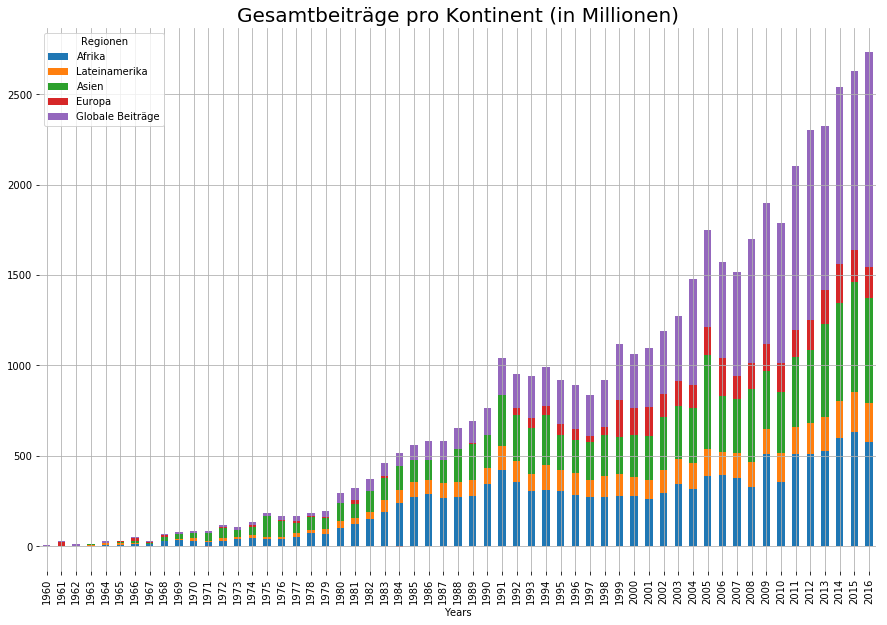

In [27]:
kontinente = ["Afrika", "Lateinamerika", "Asien", "Europa", "Globale Beiträge"]
ax = apd_totals.loc[kontinente].T.plot.bar(stacked=True, figsize=(15,10), grid=True)
ax.set_title("Gesamtbeiträge pro Kontinent (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Das Total der Entwicklungshilfebeiträge nimmt seit 1960 mit einigen Ausnahmen kontinuierlich zu. Der relative Anteil der Kontinente wächst ungefähr proportional. Im Verhältnis stärker wachsen die globalen Beiträge und die Beiträge an europäische Länder. Einen klareren Überblick zu den Anteilen der Kontinente am Totalbetrag über die Jahre gibt die folgende Graphik.

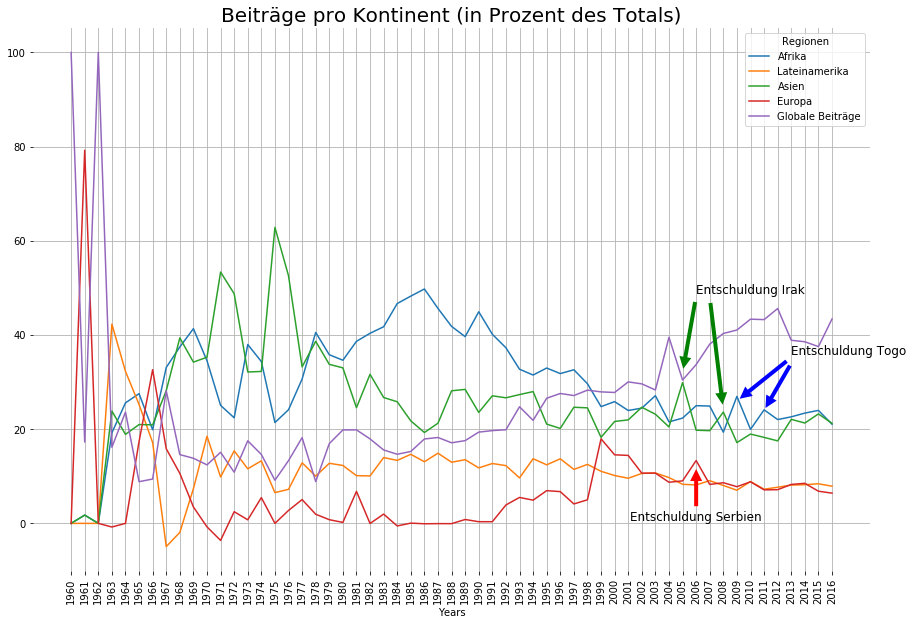

In [28]:
ax = (apd_totals.loc[kontinente]*100 / apd_totals.loc["Total"]).T.plot.line(figsize=(15,10),
                                                                  grid=True)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Beiträge pro Kontinent (in Prozent des Totals)", fontsize=20)
ax.annotate('Entschuldung Irak', xy=(45, 32),  
            xytext=(50, 51), 
            arrowprops=dict(facecolor='green', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12
            
            )
ax.annotate('', xy=(48, 24),  
            xytext=(47, 48),
            arrowprops=dict(facecolor='green', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=10
            )

ax.annotate('Entschuldung Togo', xy=(49, 26),  
            xytext=(53, 38), 
            arrowprops=dict(facecolor='blue', lw=0, shrink=0.05),
            horizontalalignment='left', verticalalignment='top', fontsize=12
            
            )
ax.annotate('', xy=(51, 24),  
            xytext=(53, 34), 
            arrowprops=dict(facecolor='blue', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12
            
            )
ax.annotate('Entschuldung Serbien', xy=(46, 12),  
            xytext=(46, 0), 
            arrowprops=dict(facecolor='red', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom', fontsize=12
            
            )
sns.despine(bottom=True, left=True)

In den 70er Jahren ging ein grosser Teil der Beiträge nach Asien, in einzelnen Jahren über 50 Prozent des gesamten Budgets. In den 80er und 90er Jahren verschob sich der Schwerpunkt nach Afrika, wobei die Beiträge für Afrika 2-3 mal höcher waren als für Asien als Lateinamerika. Für Europa gab es in den 80er Jahren wenig bis gar keine Beiträge. Seit der Jahrtausendwende machen globale Beiträge den grössten Anteil aus. Die Beiträge für Asien und Afrika sind seither prozentual etwa ähnlich und doppelt so gross wie die Beiträge für Lateinamerika oder Europa. Ganz grob sind die Anteile in den letzten zehn Jahren ungefähr Globale Beiträge 40%, Afrika und Asien je 20%, Europa und Lateinamerika je 10%. Europa und Lateinamerika hatte ausser in einzelnen Jahren in den 60ern nie höchste Priorität. 

Oft machen Beiträge an einzelne Länder einen erheblichen Teil des Gesamtbudgets aus. So zum Beispiel die Entschuldungsmassnahmen für Irak, Togo und Serbien. Im nächsten Abschnittt werden Beiträge an einzelne Länder weiter untersucht.

## 3. Beiträge pro Land <a class="anchor" id="beiträge-pro-land"></a>

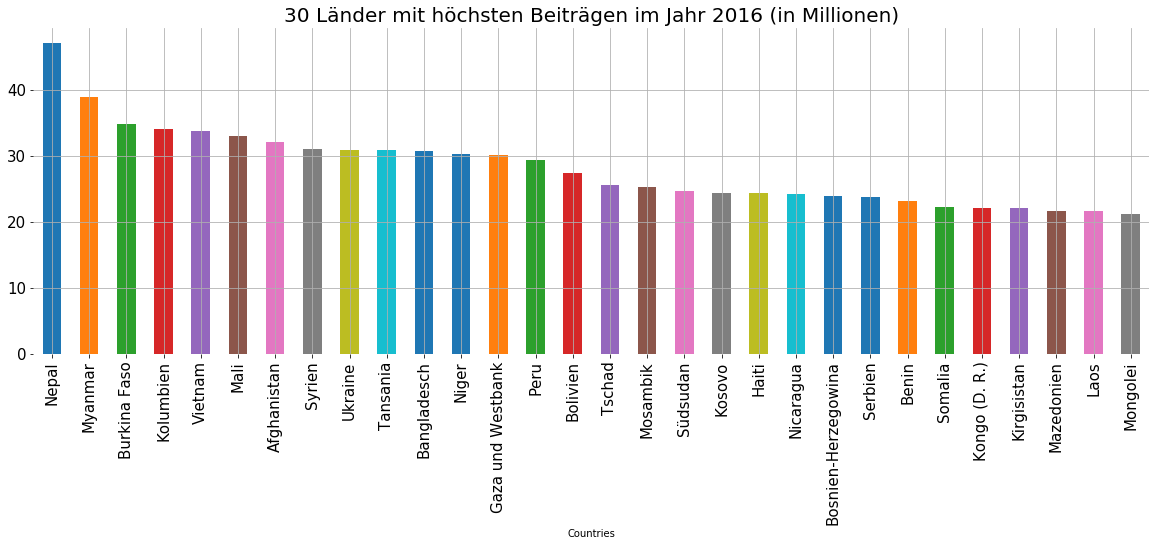

In [29]:
ax = apd['2016'].sort_values(ascending=False).head(30).plot.bar(figsize=(20,6), grid=True, fontsize=15)
ax.set_title("30 Länder mit höchsten Beiträgen im Jahr 2016 (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Der grösste Betrag geht im Jahr 2016 nach Nepal. Dies ist zwar mit einem recht grossen Abstand von rund 8 Millionen Franken der grösste Betrag, der für ein einzelnes Land aufgewendet wird, ist aber nicht absolute Spitze vergleicht man den Betrag mit der Einwohnerzahl. Pro Person in Nepal investiert die Schweiz 2016 etwa 1.60 Fr. Rund acht mal mehr sind es im Kosovo mit 13.40 Fr. pro Einwohner.

In [31]:
pro_pers_nepal = apd['2016']['Nepal']*1000000/metadata['Bev 2016']['Nepal']
pro_pers_kosovo = apd['2016']['Kosovo']*1000000/metadata['Bev 2016']['Kosovo']
print("Franken pro Person in Nepal:\t %f" %pro_pers_nepal)
print("Franken pro Person im Kosovo:\t %f" %pro_pers_kosovo)

Franken pro Person in Nepal:	 1.621653
Franken pro Person im Kosovo:	 13.434644


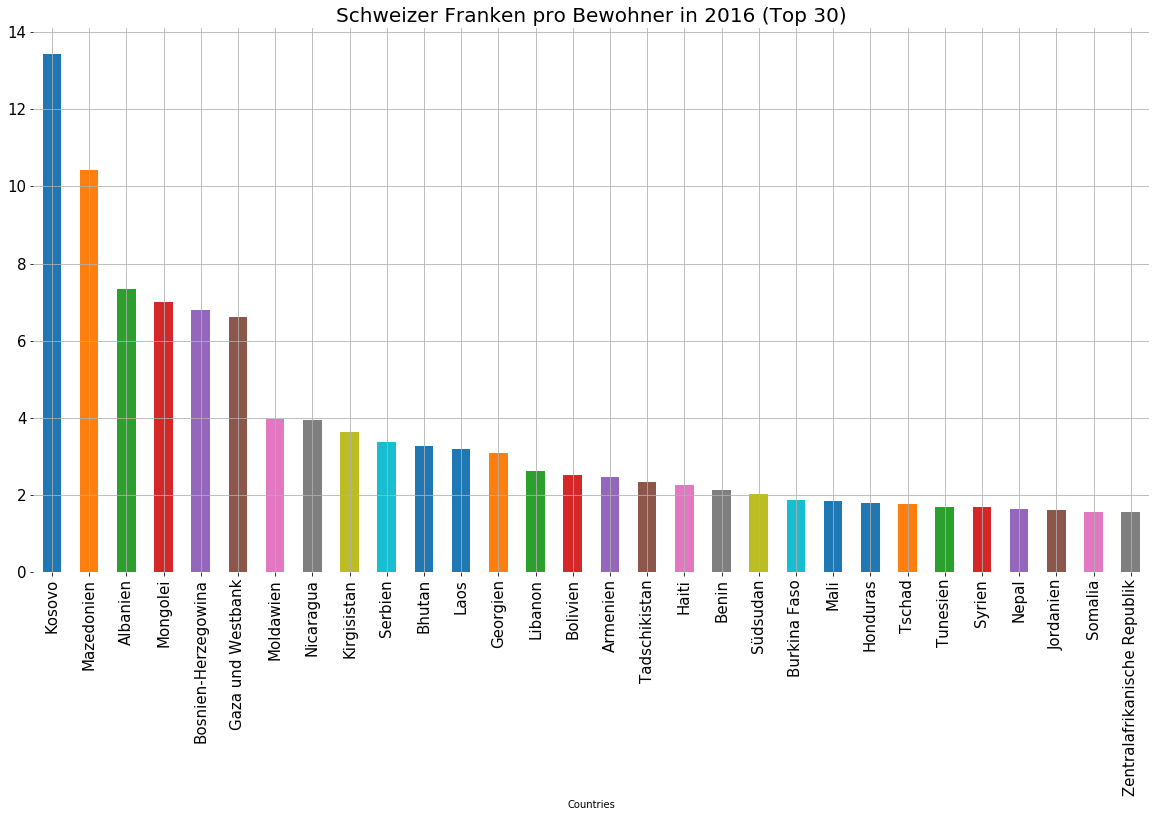

In [32]:
ax = (apd['2016']*1000000/metadata['Bev 2016'].astype(float)).sort_values(ascending=False).head(30).plot.bar(figsize=(20,10),
                                                                                              grid=True,
                                                                                                fontsize=15)
ax.set_title("Schweizer Franken pro Bewohner in 2016 (Top 30)", fontsize=20)
sns.despine(bottom=True, left=True)

Schaut man ausserdem die historische Entwicklung der Beiträge an verschiedene Länder an, sieht man dass Nepal nur in den Jahren 2015-2016 den höchsten Betrag erhielt, also die zwei Jahre nach dem verheerenden Erdbeben im Frühling 2016. Die folgende Graphik zeigt Länder, die seit 1960 mindestens in einem Jahr den höchsten Betrag erhielten.

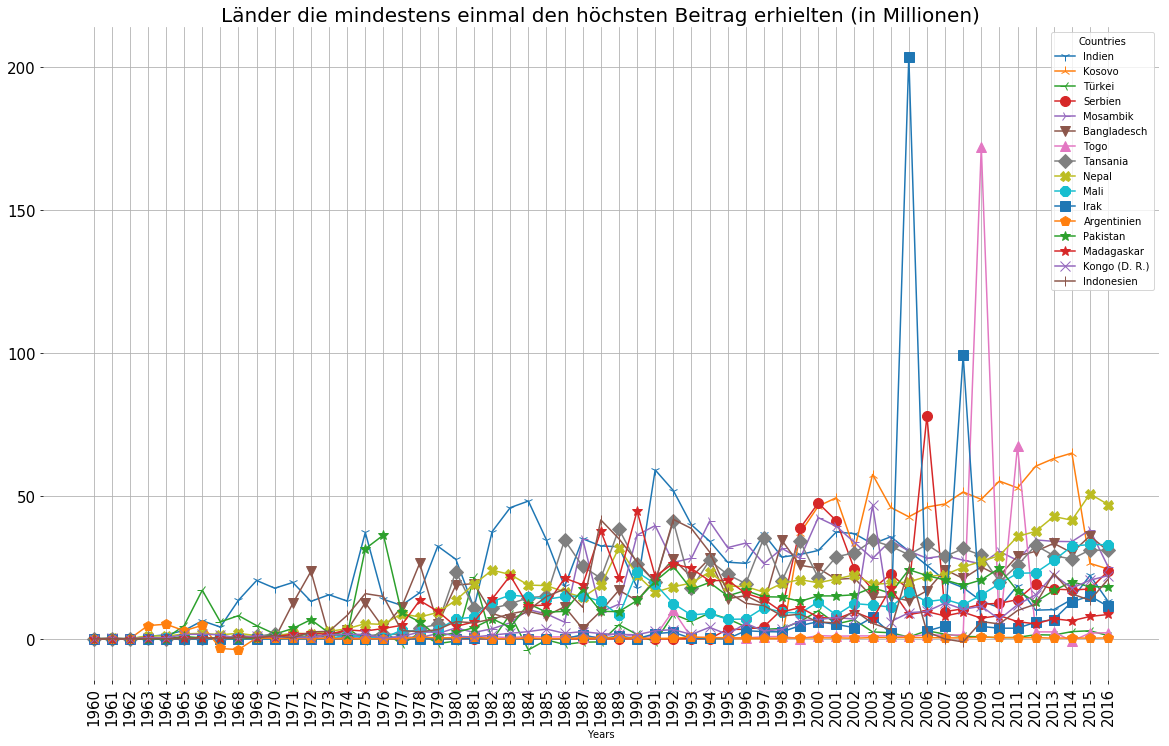

In [33]:
maxapd = []
maxapd_y = []

for year in apd.columns.tolist():
    maxapd.append(apd[year].idxmax())
    maxapd_y.append((year, apd[year].idxmax()))

maxapdd = Counter(maxapd)
sorted_maxapd = sorted([(maxapdd[x], x) for x in maxapdd], reverse=True)
maxapd_countries = [key[1] for key in sorted_maxapd]
style=['1-','2-','3-', 'o-', '4-', 'v-', '^-', 'D-', 'X-', '8-', 's-', 'p-','*-','*-', 'x-', '|-']
ax = apd.loc[maxapd_countries].T.plot.line(figsize=(20,12), grid=True,  style=style, fontsize=15,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Länder die mindestens einmal den höchsten Beitrag erhielten (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Die Gründe für die extremen Ausreisser, wie Togo [2009] und [2011] oder Irak [2005] und 2008, Serbien 2006 stehen mit Abkommen zur Annulierung der Aussenschulden in Verbindung, die in diesen Jahren geschlossen wurden. 

[2005]: https://www.eda.admin.ch/eda/de/home/aussenpolitik/voelkerrecht/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_97.contract99992920.html?_charset_=UTF-8 
[2009]: https://www.dfae.admin.ch/eda/en/home/foreign-policy/international-law/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_9.contract99993559.html?_charset_=UTF-8
[2011]: https://www.dfae.admin.ch/eda/en/home/foreign-policy/international-law/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_97.contract99994114.html?_charset_=UTF-8

Diese Länder erhielten abgesehen von den Jahren mit Entschuldungsmassnahmen eher kleine Beiträge.

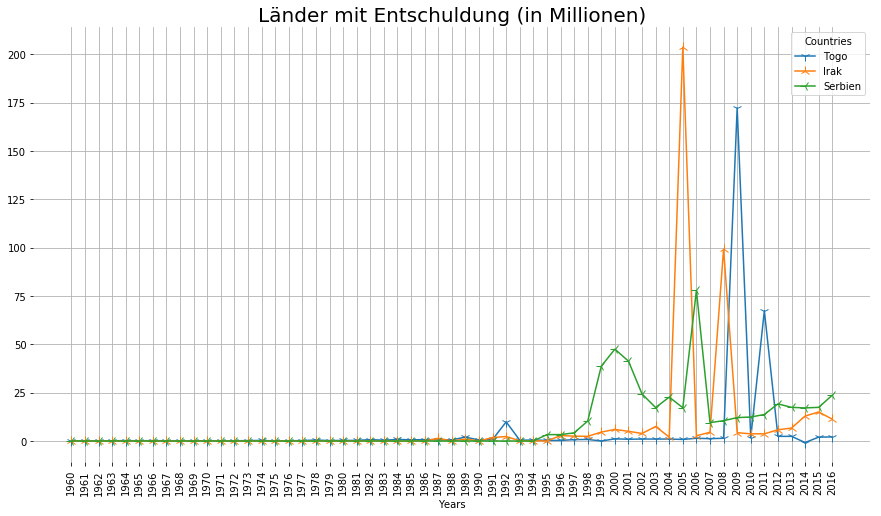

In [34]:
ax = apd.loc[['Togo', 'Irak', 'Serbien']].T.plot.line(figsize=(15,8), grid=True, 
                                                      style=style, fontsize=10,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Länder mit Entschuldung (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Die längste Zeit den höchsten Betrag erhielt Indien für insgesamt 20 Jahre.

| Land          | Anzahl Jahre |  Jahre         |
|---------------|-------|-----------|
| Indien        |    20 |1968-71, 1973-75, 1977, 1979-80, 1982-85, 1991-93, 1997, 2002 |
| Kosovo        |     8 | 2001, 2003-04, 2007, 2011-14          |
| Türkei        |     4 |1965-67, 1981           |
| Serbien       |     3 |1999-2000, 2007           |
| Mosambik      |     3 | 1994-96          |
| Bangladesch   |     3 |  1972, 1978         |
| Togo          |     2 | 2009, 2011 |
| Tansania      |     2 | 1986, 1989          |
| Nepal         |     2 | 2016-16          |
| Mali          |     2 |1960, 1962           |
| Irak          |     2 | 2005, 2008          |
| Argentinien   |     2 |   1963-64 |
| Pakistan      |     1 |      1976 |
| Madagaskar    |     1 |1990           |
| Kongo (D. R.) |     1 | 1961          |
| Indonesien    |     1 |  1988         |


## 4. Totalbeträge seit 1960 <a class="anchor" id="totalbeiträge"></a>

In [40]:
total_entwicklungshilfe = apd_totals.loc[kontinente].sum(axis=1).sum()/1000
print("Total Entwicklungshilfe seit 1960: %f Milliarden" %total_entwicklungshilfe)

Total Entwicklungshilfe seit 1960: 47.069500 Milliarden


### Totalbeträge pro Kontinent

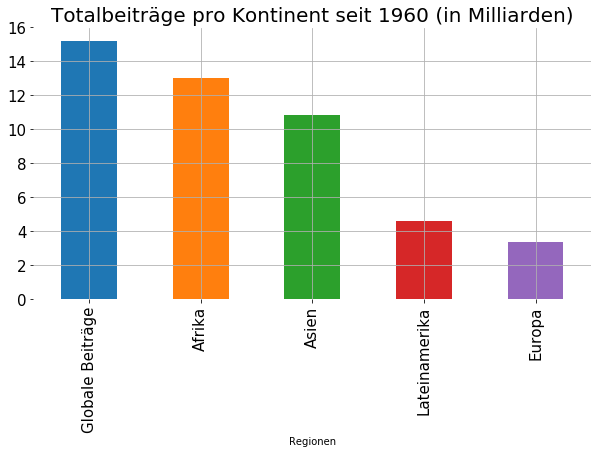

In [35]:
total_sum = apd_totals.loc[kontinente].sum(axis=1)
ax = (total_sum.sort_values(ascending=False)/1000).head(30).plot.bar(figsize=(10,5), grid= True, fontsize=15)
ax.set_title("Totalbeiträge pro Kontinent seit 1960 (in Milliarden)", fontsize=20)
sns.despine(bottom=True, left=True)

### Totalbeiträge pro Land 

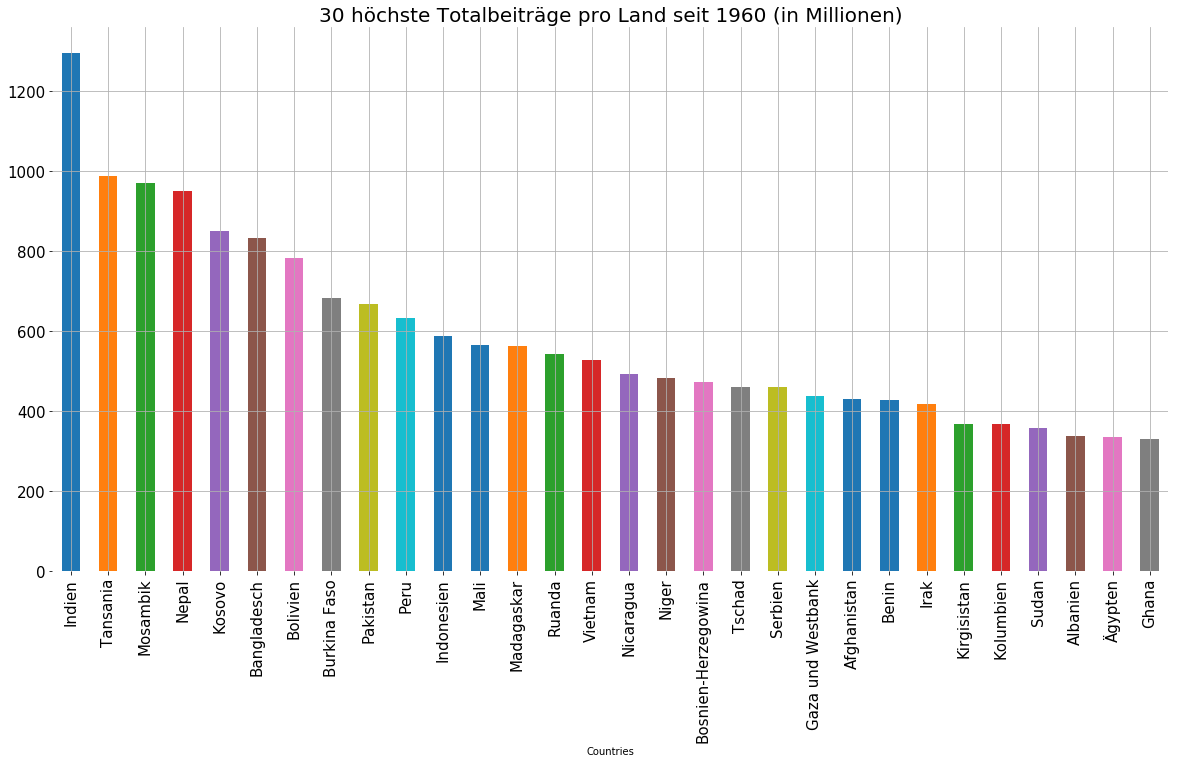

In [877]:
apd_sum = apd.sum(axis=1)
ax = apd_sum.sort_values(ascending=False).head(30).plot.bar(figsize=(20,10), grid= True, fontsize=15)
ax.set_title("30 höchste Totalbeiträge pro Land seit 1960 (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Der grösste Gesamtbetrag seit 1960 wurde für Indien aufgewendet. Wiederum möchte man aber die Absolutbeträge in Relation zu einer andern Grösse vergleichen. Die Bevölkerung von Indien ist bekanntlich die zweitgrösste der Welt. Vergleicht man die Totalbeträge mit der heutigen Bevölkerung relativiert sich der Betrag. Die Totalinvestition der Schweiz für jeden heute lebenden Inder seit 1960 ist nicht einmal ein Franken. Im angrenzenden Bhutan sind es 250 mal mehr.

In [859]:
tot_per_indian = apd_sum['Indien']*1000000/float(metadata['Bev 2016']['Indien'])
tot_per_bhutanese = apd_sum['Bhutan']*1000000/float(metadata['Bev 2016']['Bhutan'])
tot_per_kosovo = apd_sum['Kosovo']*1000000/float(metadata['Bev 2016']['Kosovo'])
print("Pro Person in Indien investiert seit 1960:\t %f Franken" %tot_per_indian)
print("Pro Person in Bhutan investiert seit 1960:\t %f Franken" %tot_per_bhutanese)
print("Pro Person im Kosovo investiert seit 1960:\t %f Franken" %tot_per_kosovo)

Pro Person in Indien investiert seit 1960:	 0.977366 Franken
Pro Person in Bhutan investiert seit 1960:	 251.327145 Franken
Pro Person im Kosovo investiert seit 1960:	 468.560731 Franken


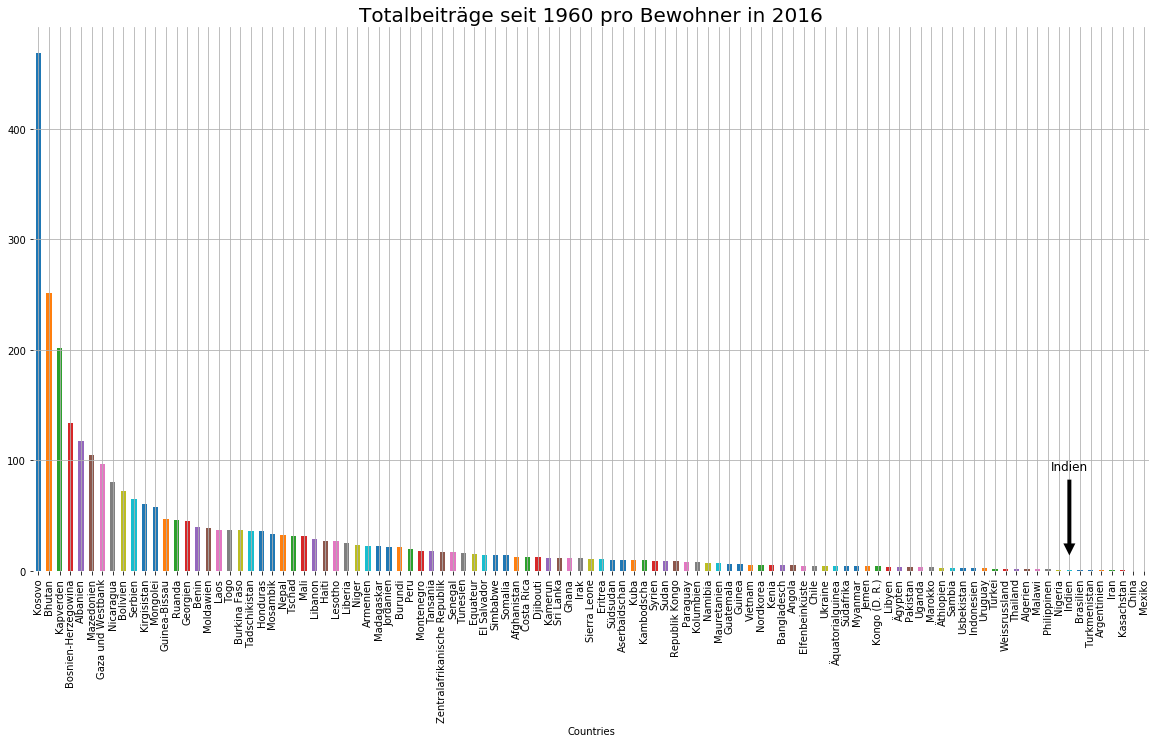

In [41]:
ax = (apd.sum(axis=1)*1000000/metadata['Bev 2016'].astype(float)).sort_values(ascending=False).plot.bar(figsize=(20,10), grid= True)
ax.set_title("Totalbeiträge seit 1960 pro Bewohner in 2016", fontsize=20)
ax.annotate('Indien', xy=(97, 10),  
            xytext=(97, 100), 
            arrowprops=dict(facecolor='black', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12        
            )
sns.despine(bottom=True, left=True)

Dies ist insbesondere bemerkenswert, als dass Kosovo als eigenes Land erst seit 1999 existiert und erst seit 20 Jahren Beiträge aus der Schweiz erhält. Die Beiträge an Bhutan erstreckten sich über die letzten 40 Jahre verteilt, die Beiträge an Indien über die letzten 50 Jahre, wie die nächste Graphik zeigt.

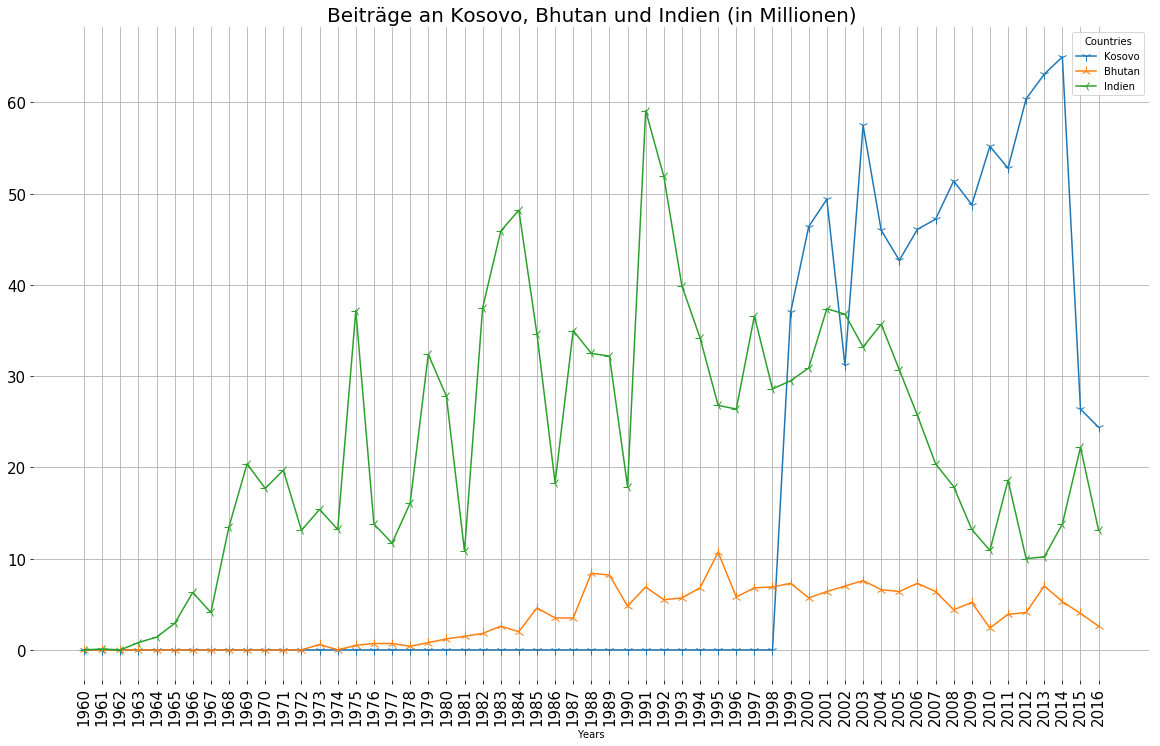

In [867]:
ax = apd.loc[['Kosovo', 'Bhutan', 'Indien']].T.plot.line(figsize=(20,12), grid=True,  style=style, fontsize=15,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Beiträge an Kosovo, Bhutan und Indien (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

## 5. Zusammenfassung <a class="anchor" id="zusammenfassung"></a>

- Die Jahresausgaben für Entwicklungshilfe sind seit 1960 kontinuierlich angestiegen.
- Insgesamt wurden seit 1960 rund 47 Milliarden Franken für Entwicklungshilfe ausgegeben.
  - 15.2 Milliarden für globale Beiträge, 
  - 13 Milliarden Afrika
  - 10.8 Milliarden in Asien
  - 4.6 Milliarden in Lateinamerika
  - 3.4 Milliarden in Europa
- Der Focus war in den 70er Jahren auf Asien, in den 80er und 90er Jahren auf Afrika. Momentan sind die Ausgaben für Afrika und Asien etwa gleich.
- Das Land mit den höchsten Totalbeiträgen ist Indien. Pro Kopf gerechnet wurde aber im Kosovo ein Vielfaches in der halben Zeit investiert.
- Beiträge an einzelne Länder können in einzelnen Jahren einen erheblichen Anteil des gesamten Jahresbudget ausmachen. Zum Beispiel Entschuldung des Irak 2005 rund 11 Prozent, oder die Entschuldung von Togo 2009 rund 9 Prozent der gesamten Jahresausgaben.

In [904]:
irak_2005_percent = 100*apd.loc['Irak']['2005']/apd_totals.loc['Total']['2005']
togo_2009_percent = 100*apd.loc['Togo']['2009']/apd_totals.loc['Total']['2009']
print("Anteil des Iraks an den Gesamtausgaben 2005:\t %f Prozent" %irak_2005_percent)
print("Anteil von Togo an den Gesamtausgaben 2009:\t %f Prozent" %togo_2009_percent)

Anteil des Iraks an den Gesamtausgaben 2005:	 11.665330 Prozent
Anteil von Togo an den Gesamtausgaben 2009:	 9.080847 Prozent
